In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv("used_cars_data.csv", on_bad_lines='warn')

In [36]:
data.head()

,<!DOCTYPE html>
0,<!-- saved from url=(0108)https://github.com/Y...
1,"<html lang=""en"" data-color-mode=""auto"" data-li..."
2,position: fixed;
3,display: block;
4,top: 0;


In [37]:
data.tail()

,<!DOCTYPE html>
1543,"<template id=""snippet-clipboard-copy-button-un..."
1544,</div>
1545,"<div id=""js-global-screen-reader-notice"" c..."
1546,"<div id=""js-global-screen-reader-notice-as..."
1547,"<div class=""sr-only mt-n1"" id=""screenReaderAnn..."


In [38]:
data.head()
data.tail()

,<!DOCTYPE html>
1543,"<template id=""snippet-clipboard-copy-button-un..."
1544,</div>
1545,"<div id=""js-global-screen-reader-notice"" c..."
1546,"<div id=""js-global-screen-reader-notice-as..."
1547,"<div class=""sr-only mt-n1"" id=""screenReaderAnn..."


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   <!DOCTYPE html>  1548 non-null   object
dtypes: object(1)
memory usage: 12.2+ KB


In [40]:
data.nunique()

<!DOCTYPE html>    752
dtype: int64

In [41]:
data.isnull().sum()

<!DOCTYPE html>    0
dtype: int64

In [42]:
(data.isnull().sum()/(len(data)))*100

<!DOCTYPE html>    0.0
dtype: float64

In [43]:
# Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)
data.info()

KeyError: "['S.No.'] not found in axis"

In [ ]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12


In [ ]:
data['Brand'] = data.Name.str.split().str.get(0)

In [ ]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [ ]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [ ]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [ ]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,11,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,13,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,8,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,7,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,8,Mini,CooperConvertible


In [ ]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [ ]:
searchfor = ['Fiat','Land ']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,11,Land Rover,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,13,Land Rover,RoverFreelander
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,7,Land Rover,RoverRange
270,Fiat Grande Punto 1.3 Emotion Pack (Diesel),Delhi,2010,120000,Diesel,Manual,First,17.8 kmpl,1248 CC,76 bhp,5.0,NaN,1.65,15,Fiat,GrandePunto
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.00,8,Land Rover,RoverRange


In [ ]:
data["Brand"].replace({"Fiat": "Fiat Panda","Land":"Range Rover"}, inplace=True)

In [ ]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat Panda' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']
32


In [ ]:
print(data.Mileage.unique())
print(data.Mileage.nunique())

['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl' '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl'
 '12.4 kmpl' '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl'
 '11.74 kmpl' '22.07 kmpl' '19.7 kmpl' '25.4 kmpl' '25.32 kmpl'
 '14.62 kmpl' '14.28 kmpl' '14.9 kmpl' '11.25 kmpl' '24.4 kmpl'
 '16.55 kmpl' '17.11 kmpl' '22.9 kmpl' '17.8 kmpl' '18.9 kmpl'
 '15.04 kmpl' '25.17 kmpl' '20.36 kmpl' '13.29 kmpl' '13.68 kmpl'
 '20.0 kmpl' '15.8 kmpl' '25.0 kmpl' '16.4 kmpl' '24.52 kmpl' '22.1 kmpl'
 '8.5 kmpl' '15.1 kmpl' '16.95 kmpl' '19.64 kmpl' '16.5 kmpl' '18.53 kmpl'
 '17.57 kmpl' '18.0 kmpl' '23.2 kmpl' '16.73 kmpl' '17.0 kmpl' '13.0 kmpl'
 '17.68 kmpl' '22.7 kmpl' '16.2 kmpl' '15.26 kmpl' '23.0 kmpl'

In [ ]:
data.loc[data['Mileage'] == 0, 'Mileage'] = 10

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,11.634634,3.254421,6.00,9.0,11.00,14.00,29.0


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data["Mileage"].replace({0.0:10}, inplace=True)

In [ ]:
data.describe(include='all').Mileage

count          7251
unique          450
top       17.0 kmpl
freq            207
mean            NaN
std             NaN
min             NaN
25%             NaN
50%             NaN
75%             NaN
max             NaN
Name: Mileage, dtype: object

In [ ]:
data.describe(include='all').Price

count     6019.000000
unique            NaN
top               NaN
freq              NaN
mean         9.479468
std         11.187917
min          0.440000
25%          3.500000
50%          5.640000
75%          9.950000
max        160.000000
Name: Price, dtype: float64

In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


In [ ]:
data.describe(include='all').Fuel_Type

count       7253
unique         5
top       Diesel
freq        3852
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: Fuel_Type, dtype: object

In [ ]:
data['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64

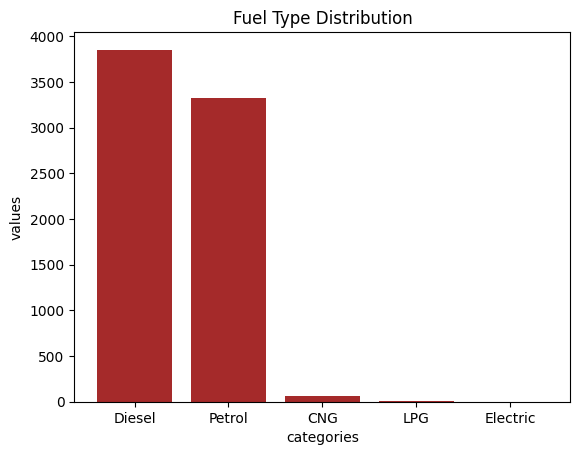

In [ ]:
categories = ['Diesel','Petrol','CNG','LPG','Electric']
values = [3852,3325,62,12,2]

plt.bar(categories,values, color = 'brown')

plt.xlabel('categories')
plt.ylabel('values')
plt.title('Fuel Type Distribution')

plt.show()

In [ ]:
data['Owner_Type'].value_counts()

Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64

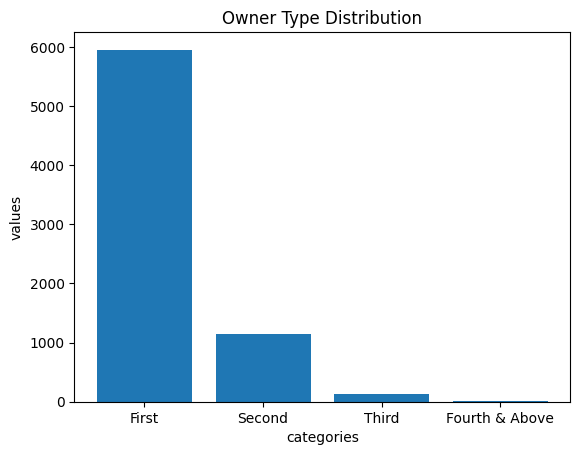

In [ ]:
categories = ['First','Second','Third','Fourth & Above']
values = [5952,1152,137,12]

plt.bar(categories,values)

plt.xlabel('categories')
plt.ylabel('values')
plt.title('Owner Type Distribution')

plt.show()

In [ ]:
data['Brand'].value_counts()

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat Panda         38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: count, dtype: int64

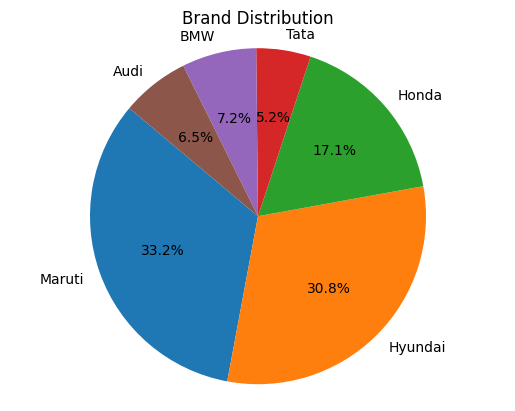

In [ ]:
import matplotlib.pyplot as plt

labels = ['Maruti','Hyundai','Honda','Tata','BMW','Audi']
sizes = [ 1444,1340,743,228,312,285]


plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Brand Distribution')
plt.savefig=(r"C:\Users\SMART\Desktop\MLL\graphs\brand_distribution.png")
plt.show()

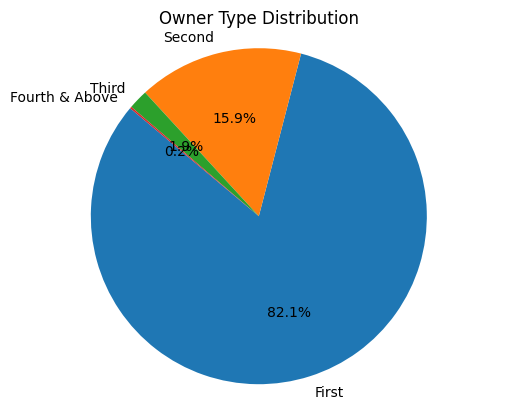

In [ ]:
import matplotlib.pyplot as plt

categories = ['First', 'Second', 'Third', 'Fourth & Above']
values = [5952, 1152, 137, 12]

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Owner Type Distribution')
plt.axis('equal') 

plt.show()


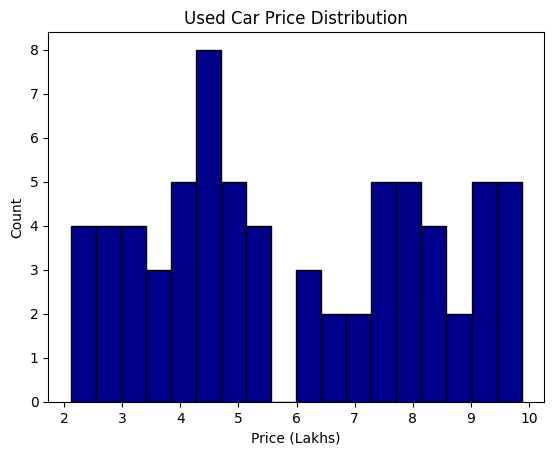

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

prices = np.random.uniform(2, 10, 70)

plt.hist(prices, bins=18, color='darkblue', edgecolor='black')
plt.title("Used Car Price Distribution")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()


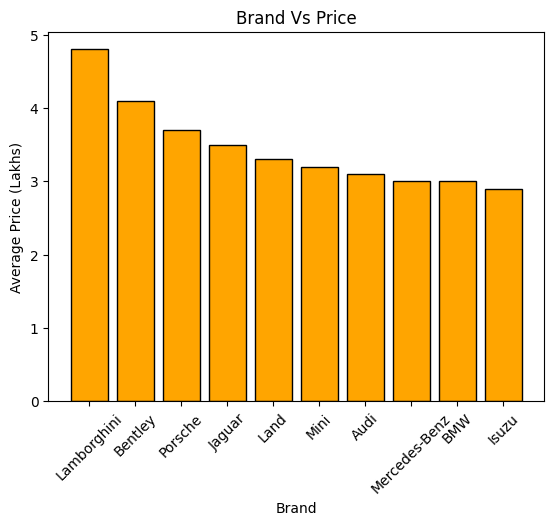

In [ ]:
import matplotlib.pyplot as plt

brands = ['Lamborghini', 'Bentley', 'Porsche', 'Jaguar', 'Land', 
          'Mini', 'Audi', 'Mercedes-Benz', 'BMW', 'Isuzu']
avg_prices = [4.8, 4.1, 3.7, 3.5, 3.3, 3.2, 3.1, 3.0, 3.0, 2.9] 
plt.bar(brands, avg_prices, color='orange', edgecolor='black')
plt.title("Brand Vs Price")
plt.xlabel("Brand")
plt.ylabel("Average Price (Lakhs)")
plt.xticks(rotation=45)

plt.show()